<a href="https://colab.research.google.com/github/anyacosta/tesis-maestria/blob/master/Colab_nino_adulto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/TFM/TL/Prueba")

In [ ]:
!ls

Entrenamiento  Prueba


In [ ]:
# Directory with our training child pictures
train_child_dir = os.path.join('/content/drive/MyDrive/TFM/TL/Prueba/Entrenamiento/Bebe')

# Directory with our training adult pictures
train_adult_dir = os.path.join('/content/drive/MyDrive/TFM/TL/Prueba/Entrenamiento/Adulto')

# Directory with our test child pictures
test_child_dir = os.path.join('/content/drive/MyDrive/TFM/TL/Prueba/Prueba/Bebe')

# Directory with our test adult pictures
test_adult_dir = os.path.join('/content/drive/MyDrive/TFM/TL/Prueba/Prueba/Adulto')

In [ ]:
train_child_names = os.listdir(train_child_dir)
print(train_child_names[:10])

train_adult_names = os.listdir(train_adult_dir)
print(train_adult_names[:10])

test_child_names = os.listdir(test_child_dir)
print(test_child_names[:10])

test_adult_names = os.listdir(test_adult_dir)
print(test_adult_names[:10])

In [ ]:
print('total training child images:', len(os.listdir(train_child_dir)))
print('total training adult images:', len(os.listdir(train_adult_dir)))
print('total validation child images:', len(os.listdir(test_child_dir)))
print('total validation adult images:', len(os.listdir(test_adult_dir)))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/TFM/TL/Prueba/Entrenamiento/',  # This is the source directory for training images
        classes = ['Bebe', 'Adulto'],
        target_size=(200,200),  # All images will be resized to 200x200
        batch_size=177,
        # Use binary labels
        class_mode='binary')

Found 177 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/TFM/TL/Prueba/Prueba/',  # This is the source directory for training images
        classes = ['Bebe', 'Adulto'],
        target_size=(200,200),  # All images will be resized to 200x200
        batch_size=28,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 28 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

test_generator.class_indices

{'Bebe': 0, 'Adulto': 1}

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [ ]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.compat.v1.Session(config=config)

In [ ]:
model = Sequential()
model.add(MobileNetV2(include_top = False, weights="imagenet", input_shape=(200, 200, 3)))
model.add(tf.keras.layers.Flatten())


model.add(Dense(512,activation='relu')),
model.add(Dense(256,activation='relu')),

model.add(Dense(1, activation = 'sigmoid'))
model.layers[0].trainable = False

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_7 (Flatten)         (None, 62720)             0         
                                                                 
 dense_19 (Dense)            (None, 512)               32113152  
                                                                 
 dense_20 (Dense)            (None, 256)               131328    
                                                                 
 dense_21 (Dense)            (None, 1)                 257       
                                                                 
Total params: 34,502,721
Trainable params: 32,244,737
Non-trainable params: 2,257,984
__________________________________

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_train.shape

(50000, 784)

In [ ]:
history = model.fit(train_generator,
      steps_per_epoch=26,  
      epochs=20,
      verbose=1,
      validation_data = test_generator,
      validation_steps=28)

Epoch 1/20
 1/26 [>.............................] - ETA: 4:39 - loss: 0.9957 - accuracy: 0.5311

26/26 [==============================] - 21s 373ms/step - loss: 0.9957 - accuracy: 0.5311 - val_loss: 57.2195 - val_accuracy: 0.5357


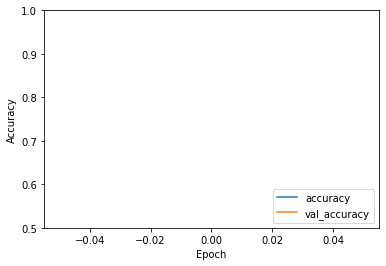

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
from tensorflow.keras.models import Sequential, save_model, load_model
filepath = '/content/drive/MyDrive/TFM/TL/Prueba/Entrenamiento/saved_model'
save_model(model, filepath)

In [ ]:
from tensorflow.keras.models import Sequential, save_model, load_model
filepath = '/content/drive/MyDrive/TFM/TL/Prueba/Entrenamiento/saved_model/'
# Load the model
model = load_model(filepath, compile = True)

In [ ]:
model.evaluate(test_generator)

1/1 [==============================] - 4s 4s/step - loss: 57.2195 - accuracy: 0.5357


[57.21954345703125, 0.5357142686843872]

In [ ]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
preds = model.predict(test_generator,
                      verbose=1)

print(preds[10])

print("prediction shape:", preds.shape)

1/1 [==============================] - 1s 986ms/step
[1.]
prediction shape: (28, 1)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Generate the predictions for each image
classes = np.greater(preds, .5)
print(1*classes)

#Predictions for first childs
print(1*classes[:5]) 
print(test_generator.classes[:5])

#Predictions for first adults
print(1*classes[956:960]) 
print(test_generator.classes[956:960])

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[0 0 0 0 0]
[]
[]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
#The confusion_matrix displays a table showing the true positives, true negatives, false positives, and false negatives.
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, classes)
print(cm)

print('Precision: %.5f' % precision_score(test_generator.classes, classes))
print('Recall: %.5f' % recall_score(test_generator.classes, classes))

NPV = cm[0][1]/(cm[0][1]+cm[1][0])
print('Specificity: %.5f' % NPV)

print('Accuracy: %.5f' % accuracy_score(test_generator.classes, classes))
print('F1 Score: %.5f' % f1_score(test_generator.classes, classes))

Confusion Matrix
[[ 0 13]
 [ 0 15]]
Precision: 0.53571
Recall: 1.00000
Specificity: 1.00000
Accuracy: 0.53571
F1 Score: 0.69767


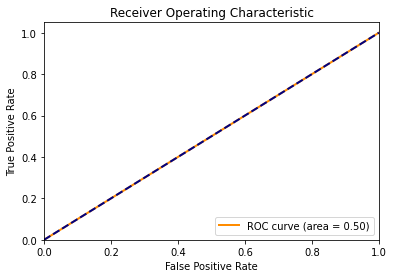

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fpr, tpr, _ = roc_curve(test_generator.classes, preds)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
